# Comparison of QAOA CVaR (Exact Cover)
In this notebook the QAOA method using the Conditional Value at risk (CVaR) is compared to the stadard QAOA for an instance of the exact cover problem. 
# Importing necessary modules

In [19]:
#run: pip install openquantumcomputing
from openquantumcomputing.QAOAExactCover import QAOAExactCover
from utilities_exactCover import computeOptimalSolution, computeAverageApproxRatio
from tailassignment_loader import *
from qiskit import *
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

# Creating problem instance

In [20]:
size = 14
flights   = 24
solutions = 5

path_to_examples = "tailassignment_samples/"

FR, CR, best_sol = load_FR_CR(path_to_examples + f'FRCR_{size}_{flights}_{solutions}.txt')

# Creating QAOA instanecs

In [21]:

params={'FR': FR}
params['CR']= CR
params['instances'] = size
qaoaec = QAOAExactCover(params=params)
alpha = 0.1     # value for CVaR (Conditional Value at Risk)
params['alpha'] = alpha
qaoaec_CVaR = QAOAExactCover(params = params)

# Sampling cost landscape for all methods

In [22]:
# Evaluating the QAOA circuit with uniformly sampled angles for gamma and beta, just to see how sampling measurements from 
# the circuits roughly looks like.
qaoaec.sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})
qaoaec_CVaR.sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})

Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2


Done execute
Done measurement
Calculating Energy landscape done
Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done


# Plotting cost landscape, for both QAOA instances

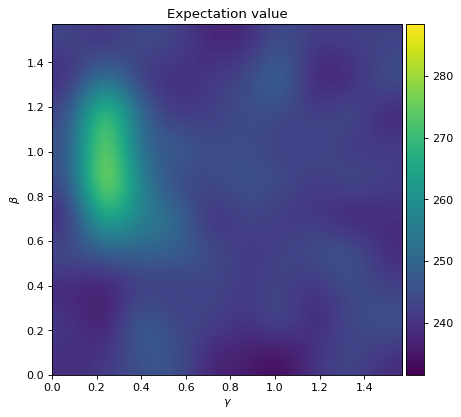

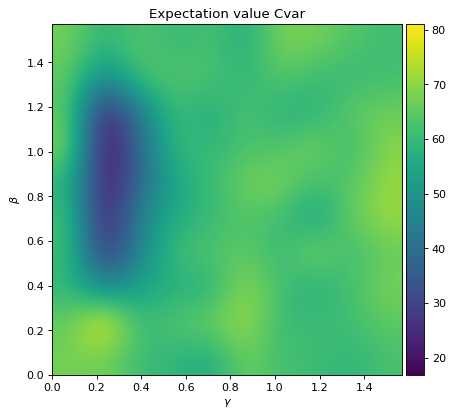

In [23]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoaec.E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value Cvar')
im = ax.imshow(qaoaec_CVaR.E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

# Increasing depth

In [24]:
maxdepth=5
for i in range(maxdepth):
    qaoaec.increase_depth()
    qaoaec_CVaR.increase_depth()

cost(depth= 1 )= 239.61816406249997
cost(depth= 1 )= 13.637254901960784
cost(depth= 2 )= 245.58789062500014
cost(depth= 2 )= 14.57843137254902
cost(depth= 3 )= 243.52441406249994
cost(depth= 3 )= 13.607843137254902
cost(depth= 4 )= 235.8994140624999
cost(depth= 4 )= 17.725490196078432
cost(depth= 5 )= 246.8955078125003
cost(depth= 5 )= 12.784313725490197


# Compute and print the optimal solution with minium cost

In [25]:
cost_func = qaoaec.cost
isFeasible_func = qaoaec.isFeasible
mincost, solution = computeOptimalSolution(cost_func, isFeasible_func, FR)
print("Optimal solution: ", solution, "\n With cost: ", mincost)

Optimal solution:  11000000000000 
 With cost:  5.0


# Compute and plot approximation ratio

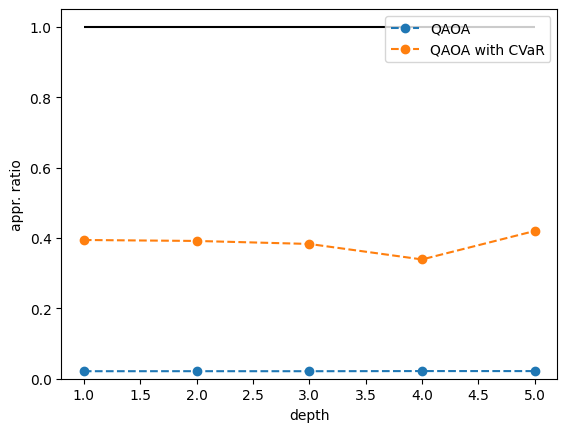

In [26]:
pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
pl.plot(np.arange(1,maxdepth+1), np.array(mincost/list(qaoaec.costval.values())),'o--', label='QAOA')
pl.plot(np.arange(1,maxdepth+1), np.array(mincost/list(qaoaec_CVaR.costval.values())),'o--', label='QAOA with CVaR')
pl.ylim(0,1.05)
_=pl.ylabel('appr. ratio')
_=pl.xlabel('depth')
_=pl.legend()

# Compute and plot approximation ratio (SECOND WAY)

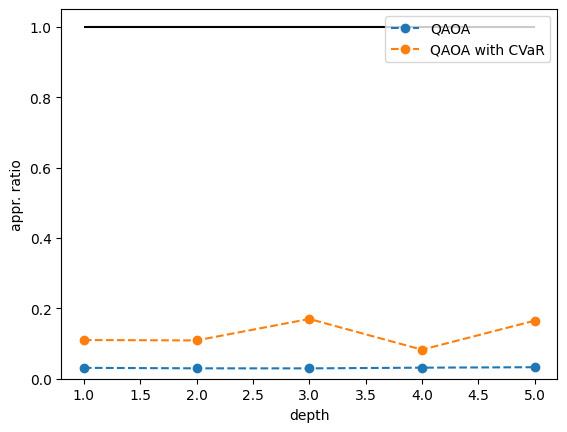

In [27]:
hists = [None]*maxdepth
hists_CVaR = [None]*maxdepth
for i in range(maxdepth):
    hists[i] = qaoaec.hist(qaoaec.angles_hist['d'+str(i+1)+'_final'])
    hists_CVaR[i] = qaoaec_CVaR.hist(qaoaec_CVaR.angles_hist['d'+str(i+1)+'_final'])


apprx_ratio = [None]*maxdepth
apprx_ratio_CVaR = [None]*maxdepth

for i in range(maxdepth):
    apprx_ratio[i] = computeAverageApproxRatio(hists[i], mincost, cost_func)
    apprx_ratio_CVaR[i] = computeAverageApproxRatio(hists_CVaR[i], mincost, cost_func) #does this method
    #of calculating the approximation ratio make sense for the CVaR method?


pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
pl.plot(np.arange(1,maxdepth+1), apprx_ratio,'o--', label='QAOA')
pl.plot(np.arange(1,maxdepth+1), apprx_ratio_CVaR,'o--', label='QAOA with CVaR')
pl.ylim(0,1.05)
_=pl.ylabel('appr. ratio')
_=pl.xlabel('depth')
_=pl.legend()